In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


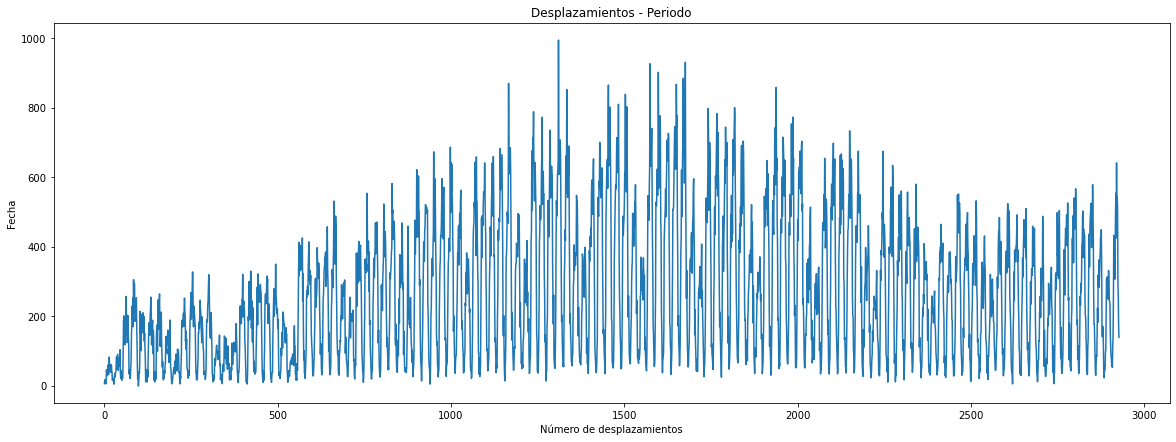

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

In [7]:
def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 0)

Periodo1['Lunes1AM'] = Periodo1['ds'].apply(est_Lunes1AM)

Periodo1['Lunes2AM'] = Periodo1['ds'].apply(est_Lunes2AM)

Periodo1['Lunes3AM'] = Periodo1['ds'].apply(est_Lunes3AM)

Periodo1['Lunes4AM'] = Periodo1['ds'].apply(est_Lunes4AM)

Periodo1['Lunes5AM'] = Periodo1['ds'].apply(est_Lunes5AM)

Periodo1['Lunes6AM'] = Periodo1['ds'].apply(est_Lunes6AM)

Periodo1['Lunes7AM'] = Periodo1['ds'].apply(est_Lunes7AM)

Periodo1['Lunes8AM'] = Periodo1['ds'].apply(est_Lunes8AM)

Periodo1['Lunes9AM'] = Periodo1['ds'].apply(est_Lunes9AM)

Periodo1['Lunes10AM'] = Periodo1['ds'].apply(est_Lunes10AM)

Periodo1['Lunes11AM'] = Periodo1['ds'].apply(est_Lunes11AM)

Periodo1['Lunes12PM'] = Periodo1['ds'].apply(est_Lunes12PM)

Periodo1['Lunes13PM'] = Periodo1['ds'].apply(est_Lunes13PM)

Periodo1['Lunes14PM'] = Periodo1['ds'].apply(est_Lunes14PM)

Periodo1['Lunes15PM'] = Periodo1['ds'].apply(est_Lunes15PM)

Periodo1['Lunes16PM'] = Periodo1['ds'].apply(est_Lunes16PM)

Periodo1['Lunes17PM'] = Periodo1['ds'].apply(est_Lunes17PM)

Periodo1['Lunes18PM'] = Periodo1['ds'].apply(est_Lunes18PM)

Periodo1['Lunes19PM'] = Periodo1['ds'].apply(est_Lunes19PM)

Periodo1['Lunes20PM'] = Periodo1['ds'].apply(est_Lunes20PM)

Periodo1['Lunes21PM'] = Periodo1['ds'].apply(est_Lunes21PM)

Periodo1['Lunes22PM'] = Periodo1['ds'].apply(est_Lunes22PM)

Periodo1['Lunes23PM'] = Periodo1['ds'].apply(est_Lunes23PM)

Periodo1['Lunes24AM'] = Periodo1['ds'].apply(est_Lunes24AM)


# IMPLEMENTACIÓN DE MODELO PROPHET
## Separamos el conjunto de datos de entrenamiento y prueba

In [8]:
Periodo1 = Periodo1.set_index('ds')

In [9]:
#Periodo 1 Desescalada y nueva Normalidad
train_end = datetime.datetime(2020,8,30,23,0,0)
test_end = datetime.datetime(2020,8,31,23,0,0)

train_data = Periodo1[:train_end]
test_data = Periodo1[train_end + timedelta(hours=1):test_end]

In [10]:
train_data = train_data.reset_index()
test_data = test_data.reset_index()

In [11]:
test_data

,ds,y,Lunes1AM,Lunes2AM,Lunes3AM,Lunes4AM,Lunes5AM,Lunes6AM,Lunes7AM,Lunes8AM,...,Lunes15PM,Lunes16PM,Lunes17PM,Lunes18PM,Lunes19PM,Lunes20PM,Lunes21PM,Lunes22PM,Lunes23PM,Lunes24AM
0,2020-08-31 00:00:00,86.844,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2020-08-31 01:00:00,82.143,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-08-31 02:00:00,58.444,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020-08-31 03:00:00,73.620,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2020-08-31 04:00:00,53.500,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2020-08-31 05:00:00,112.960,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2020-08-31 06:00:00,143.088,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2020-08-31 07:00:00,252.659,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,2020-08-31 08:00:00,433.064,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,2020-08-31 09:00:00,371.916,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Ajustamos el periodo de Fourier-Horas con el periodo de datos entrenamiento

In [12]:
mask8AM = (train_data['Lunes8AM'] == True)
mask14PM = (train_data['Lunes14PM'] == True)
mask16PM = (train_data['Lunes16PM'] == True)

Patron8AM = train_data.loc[mask8AM]
Patron14PM = train_data.loc[mask14PM]
Patron16PM = train_data.loc[mask16PM]

In [13]:
start8AM = Patron8AM.iloc[0]['ds']
end8AM = Patron8AM.iloc[-1]['ds'] 
N_Dias = pd.date_range(start8AM, end8AM, freq='D')
print(len(N_Dias))
print(N_Dias)

113
DatetimeIndex(['2020-05-04 08:00:00', '2020-05-05 08:00:00',
               '2020-05-06 08:00:00', '2020-05-07 08:00:00',
               '2020-05-08 08:00:00', '2020-05-09 08:00:00',
               '2020-05-10 08:00:00', '2020-05-11 08:00:00',
               '2020-05-12 08:00:00', '2020-05-13 08:00:00',
               ...
               '2020-08-15 08:00:00', '2020-08-16 08:00:00',
               '2020-08-17 08:00:00', '2020-08-18 08:00:00',
               '2020-08-19 08:00:00', '2020-08-20 08:00:00',
               '2020-08-21 08:00:00', '2020-08-22 08:00:00',
               '2020-08-23 08:00:00', '2020-08-24 08:00:00'],
              dtype='datetime64[ns]', length=113, freq='D')


In [14]:
start14PM = Patron14PM.iloc[0]['ds']
end14PM = Patron14PM.iloc[-1]['ds'] 
N_Dias = pd.date_range(start14PM, end14PM, freq='D')
print(len(N_Dias))

113


## Aplicamos Rolling Forecasting para evaluación del modelo

In [15]:
# Se crea una función de predicción continua
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data.copy()   # El problema es en history   
    
    for t in range(len(test_data)):        
        m = Prophet()          
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#         m.add_seasonality(name='Lunes24AM_season', period=127, fourier_order=7, condition_name='Lunes24AM')
#         m.add_seasonality(name='Lunes1AM_season', period=127, fourier_order=7, condition_name='Lunes1AM')
#         m.add_seasonality(name='Lunes2AM_season', period=127, fourier_order=7, condition_name='Lunes2AM')
#         m.add_seasonality(name='Lunes3AM_season', period=127, fourier_order=7, condition_name='Lunes3AM')
#         m.add_seasonality(name='Lunes4AM_season', period=127, fourier_order=7, condition_name='Lunes4AM')
#         m.add_seasonality(name='Lunes5AM_season', period=127, fourier_order=7, condition_name='Lunes5AM')
#         m.add_seasonality(name='Lunes6AM_season', period=127, fourier_order=7, condition_name='Lunes6AM')
#         m.add_seasonality(name='Lunes7AM_season', period=127, fourier_order=7, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=113, fourier_order=4, condition_name='Lunes8AM')
#         m.add_seasonality(name='Lunes9AM_season', period=127, fourier_order=7, condition_name='Lunes9AM')
#         m.add_seasonality(name='Lunes10AM_season', period=127, fourier_order=7, condition_name='Lunes10AM')
#         m.add_seasonality(name='Lunes11AM_season', period=127, fourier_order=7, condition_name='Lunes11AM')
#         m.add_seasonality(name='Lunes12PM_season', period=127, fourier_order=7, condition_name='Lunes12PM')
#         m.add_seasonality(name='Lunes13PM_season', period=127, fourier_order=7, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=113, fourier_order=4, condition_name='Lunes14PM')        
#         m.add_seasonality(name='Lunes15PM_season', period=127, fourier_order=7, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=113, fourier_order=4, condition_name='Lunes16PM')
#         m.add_seasonality(name='Lunes17PM_season', period=127, fourier_order=7, condition_name='Lunes17PM')
#         m.add_seasonality(name='Lunes18PM_season', period=127, fourier_order=7, condition_name='Lunes18PM')
#         m.add_seasonality(name='Lunes19PM_season', period=127, fourier_order=7, condition_name='Lunes19PM')
#         m.add_seasonality(name='Lunes20PM_season', period=127, fourier_order=7, condition_name='Lunes20PM')
#         m.add_seasonality(name='Lunes21PM_season', period=127, fourier_order=7, condition_name='Lunes21PM')
#         m.add_seasonality(name='Lunes22PM_season', period=127, fourier_order=7, condition_name='Lunes22PM')
#         m.add_seasonality(name='Lunes23PM_season', period=127, fourier_order=7, condition_name='Lunes23PM')
        
    
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')           
        
        
        future['Lunes1AM'] = future['ds'].apply(est_Lunes1AM)        
        future['Lunes2AM'] = future['ds'].apply(est_Lunes2AM)        
        future['Lunes3AM'] = future['ds'].apply(est_Lunes3AM)        
        future['Lunes4AM'] = future['ds'].apply(est_Lunes4AM)        
        future['Lunes5AM'] = future['ds'].apply(est_Lunes5AM)        
        future['Lunes6AM'] = future['ds'].apply(est_Lunes6AM)        
        future['Lunes7AM'] = future['ds'].apply(est_Lunes7AM)       
        future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)        
        future['Lunes9AM'] = future['ds'].apply(est_Lunes9AM)        
        future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)        
        future['Lunes11AM'] = future['ds'].apply(est_Lunes11AM)        
        future['Lunes12PM'] = future['ds'].apply(est_Lunes12PM)        
        future['Lunes13PM'] = future['ds'].apply(est_Lunes13PM)        
        future['Lunes14PM'] = future['ds'].apply(est_Lunes14PM)        
        future['Lunes15PM'] = future['ds'].apply(est_Lunes15PM)        
        future['Lunes16PM'] = future['ds'].apply(est_Lunes16PM)        
        future['Lunes17PM'] = future['ds'].apply(est_Lunes17PM)        
        future['Lunes18PM'] = future['ds'].apply(est_Lunes18PM)        
        future['Lunes19PM'] = future['ds'].apply(est_Lunes19PM)        
        future['Lunes20PM'] = future['ds'].apply(est_Lunes20PM)        
        future['Lunes21PM'] = future['ds'].apply(est_Lunes21PM)        
        future['Lunes22PM'] = future['ds'].apply(est_Lunes22PM)        
        future['Lunes23PM'] = future['ds'].apply(est_Lunes23PM)        
        future['Lunes24AM'] = future['ds'].apply(est_Lunes24AM)
        
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data[['ds','y','Lunes1AM','Lunes2AM','Lunes3AM','Lunes4AM','Lunes5AM','Lunes6AM','Lunes7AM','Lunes8AM','Lunes9AM','Lunes10AM','Lunes11AM','Lunes12PM','Lunes13PM','Lunes14PM','Lunes15PM','Lunes16PM','Lunes17PM','Lunes18PM','Lunes19PM','Lunes20PM','Lunes21PM','Lunes22PM','Lunes23PM','Lunes24AM']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -117.378
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5545.08    0.00130225       113.258           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       5547.49   0.000122959       81.1475   1.131e-06       0.001      195  LS failed, Hessian reset 
     187       5548.41   0.000307945       139.623    3.11e-06       0.001      290  LS failed, Hessian reset 
     199       5548.47   0.000107322       66.5714       0.617       0.617      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5549.81   3.13198e-05       71.1047      0.1804      0.1804      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       5550.46   0.000160232        123.47   1.932e-06       0.001      612  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -126.749
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       5547.69   0.000115677        76.676   1.101e-06       0.001      151  LS failed, Hessian reset 
      99       5548.13   0.000680724       118.587      0.7478      0.7478      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       5548.66   0.000172256       91.7589   2.452e-06       0.001      220  LS failed, Hessian reset 
     141       5549.51     0.0001881       74.3609   8.921e-07       0.001      302  LS failed, Hessian reset 
     183       5550.66   0.000169167       62.5731   2.639e-06       0.001      409  LS failed, Hessian reset 
     199       5550.72   0.000197754       56.2059      0.5984           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       5551.77   0.000372209       171.758   3.241e-06   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -128.375
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5550.12    0.00665891       100.731       2.354      0.5969      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5554.17    0.00066474       119.853      0.8851      0.8851      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       5554.85   0.000177979       98.0777   1.165e-06       0.001      386  LS failed, Hessian reset 
     299       5555.01   5.42518e-05       68.0445           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       5555.07   0.000101164       76.8196   1.982e-06       0.001      517  LS failed, Hessian reset 
     399        5555.1   0.000116167       66.5187           1           1      594   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -136.861
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5552.84    0.00729206       84.9652           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       5553.76   0.000208706        100.93   9.958e-07       0.001      197  LS failed, Hessian reset 
     151        5555.1   0.000229264       124.277   1.927e-06       0.001      288  LS failed, Hessian reset 
     199       5555.92   0.000382286       77.1306      0.5064      0.5064      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5556.26   0.000199668       121.425   2.069e-06       0.001      431  LS failed, Hessian reset 
     299       5556.82   0.000115954       97.5039      0.4965      0.4965      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -131.378
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5553.96    0.00124979       107.655      0.4539      0.4539      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5557.83   0.000809628       65.6376      0.8876      0.8876      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5558.28   0.000259926        100.49    8.84e-07       0.001      303  LS failed, Hessian reset 
     299        5559.2    0.00143635       54.7513      0.6887      0.6887      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       5559.32   0.000157758       108.264   1.488e-06       0.001      451  LS failed, Hessian reset 
     376       5559.62   1.64476e-05       62.7771   2.491e-07       0.001      570  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -138.711
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5556.4   0.000717644       136.065      0.7368      0.7368      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       5558.13   0.000211376       113.009   2.064e-06       0.001      180  LS failed, Hessian reset 
     183       5559.59   0.000310664       145.041   4.597e-06       0.001      282  LS failed, Hessian reset 
     199       5559.79    0.00125786       52.5164           1           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5560.45   0.000233421       139.035   2.045e-06       0.001      419  LS failed, Hessian reset 
     299       5561.07   0.000116808       57.5899      0.4153           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -118.222
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5559.21     0.0244814       395.686           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       5561.68   0.000225444       140.761   3.165e-06       0.001      266  LS failed, Hessian reset 
     199       5561.87   0.000424536       65.8908      0.1983           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       5562.89    0.00304387       245.191    4.23e-05       0.001      408  LS failed, Hessian reset 
     299       5563.23   0.000915516       66.9368           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       5563.85   0.000597149        78.761   8.081e-06       0.001      566  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -109.172
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5561.34    0.00415186       154.016      0.6311      0.6311      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131        5563.1   0.000236566        94.575   3.691e-06       0.001      205  LS failed, Hessian reset 
     147       5563.45   0.000197755       109.277   1.737e-06       0.001      261  LS failed, Hessian reset 
     183       5563.78   0.000448125       79.2847    6.03e-06       0.001      338  LS failed, Hessian reset 
     199       5563.79   6.42956e-06        64.928      0.5531      0.5531      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5563.79   1.58988e-06       53.3783    3.27e-08       0.001      414  LS failed, Hessian reset 
     218       5563.79   1.56191e-07       44.8117      0.3643   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -83.7407
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5563.63    0.00574991       271.843      0.3939           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          5567    0.00562691        152.86      0.4644           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       5567.75   0.000216347       134.972   2.127e-06       0.001      320  LS failed, Hessian reset 
     297       5568.45   0.000234499       69.6774    3.49e-06       0.001      450  LS failed, Hessian reset 
     299       5568.45   7.75046e-05       46.4224      0.8056      0.8056      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5568.59   3.33256e-05       66.8241      0.9487      0.9487      591   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -67.5029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5565.62    0.00957561       131.638      0.9606      0.9606      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       5569.05   0.000603787       198.101    7.51e-06       0.001      280  LS failed, Hessian reset 
     199       5569.15    0.00092851       80.5297      0.3782           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       5570.07   2.14091e-05       46.7406   3.115e-07       0.001      447  LS failed, Hessian reset 
     299       5570.07   1.42017e-05       66.6221           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324        5570.1   0.000101291       60.5535   1.422e-06       0.001      525  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -69.446
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5567.29    0.00119776       145.858      0.1964           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5570.6    0.00141541       65.7106      0.3611       0.713      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5572.05   0.000254899       53.6529      0.4384      0.4384      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       5572.13   9.88821e-05       58.9425   1.697e-06       0.001      444  LS failed, Hessian reset 
     370       5572.14   3.09152e-07       59.5412       0.166      0.7234      511   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -68.3915
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5569.35    0.00276792       184.175      0.3234           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       5570.44    0.00102981       283.297   8.637e-06       0.001      167  LS failed, Hessian reset 
     158       5571.87   0.000368277       152.894   6.021e-06       0.001      261  LS failed, Hessian reset 
     176       5571.96   4.78607e-05        67.953    8.41e-07       0.001      315  LS failed, Hessian reset 
     199       5571.96   0.000229804       71.4388          10           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5573.59   0.000171787       59.8364      0.6376      0.6376      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -75.5073
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5571.75    0.00105748       106.517      0.8493      0.8493      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5574.38   0.000545173       71.5493           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5575.55     0.0002049       98.2408   9.681e-07       0.001      332  LS failed, Hessian reset 
     299       5576.12   4.28307e-05       57.1301           1           1      425   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       5576.32   0.000197335       138.172   1.184e-06       0.001      505  LS failed, Hessian reset 
     368       5576.43   4.09526e-07       49.6816      0.0124           1      558   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -68.0786
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5574.32    0.00364324       152.701           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5577.67    0.00144414        83.932      0.7213      0.7213      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5578.41   4.72175e-05       57.3208           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5578.88   4.65854e-05       48.9705      0.6516      0.6516      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     423       5578.89   0.000104878       62.9502   1.004e-06       0.001      569  LS failed, Hessian reset 
     466       5578.93   5.40493e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -69.0218
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5576.31    0.00372043       112.205           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       5578.02   0.000480129       202.122   3.839e-06       0.001      182  LS failed, Hessian reset 
     180       5579.72    0.00153606       133.542   2.859e-05       0.001      297  LS failed, Hessian reset 
     199        5579.9   0.000641721       116.011           1           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230        5580.3   0.000615125       51.8719   8.927e-06       0.001      396  LS failed, Hessian reset 
     299       5580.63   2.73287e-05       81.1651      0.7699      0.7699      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -74.5092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5576.33    0.00839157        238.39           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       5577.96   0.000432427        164.62   3.551e-06       0.001      183  LS failed, Hessian reset 
     183       5579.92   0.000423492       169.073   5.188e-06       0.001      294  LS failed, Hessian reset 
     199        5580.1    0.00031692       69.2474           1           1      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5580.48   0.000954018       215.513   1.146e-05       0.001      409  LS failed, Hessian reset 
     299       5580.81   6.94789e-05       64.6283      0.2388           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -67.5725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5579.18   0.000794159       60.9086           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5582.19   0.000528204       71.5016      0.2631           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       5583.42   0.000212493       122.208   1.506e-06       0.001      380  LS failed, Hessian reset 
     299       5583.72    0.00015824       62.5121      0.8263      0.8263      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       5583.89   0.000152033       101.464   2.076e-06       0.001      507  LS failed, Hessian reset 
     373        5583.9   2.46547e-07       44.2811      0.4198           1      561   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -88.3354
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5576.51     0.0133258       193.853           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5579.79    0.00085985        72.085           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5581.31   0.000124068       68.8515      0.2315           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335       5581.58   0.000759239       225.721   6.536e-06       0.001      464  LS failed, Hessian reset 
     399       5581.78    0.00346348       90.2362           1           1      553   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     461       5582.09   0.000139956    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -68.8987
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5578.02   0.000492273       89.8253           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5582.83   0.000561795       47.1906      0.3544           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       5583.26   0.000177951       103.927   1.662e-06       0.001      317  LS failed, Hessian reset 
     299       5584.19   6.32954e-05       61.0337       0.398       0.398      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       5584.21   0.000212726       83.2027   4.271e-06       0.001      458  LS failed, Hessian reset 
     369       5584.39   0.000163452       96.9349    1.82e-06       0.001      604  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -73.2176
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5581.89    0.00325577       58.3296           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       5582.71   0.000184599       76.2806   8.934e-07       0.001      186  LS failed, Hessian reset 
     161       5584.19   0.000176399       110.815   2.004e-06       0.001      277  LS failed, Hessian reset 
     199       5584.49    0.00105849       71.7692           1           1      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     291       5586.02   0.000268907       141.111    3.38e-06       0.001      492  LS failed, Hessian reset 
     299       5586.17    0.00021024       69.9994           1           1      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -70.136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5583.44    0.00279482       217.041      0.3959           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5586.32    0.00221076       69.3508           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5588.02   0.000399437       149.541   6.351e-06       0.001      367  LS failed, Hessian reset 
     299        5588.3   0.000479273       70.8822       0.221           1      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335       5588.34   0.000223657       69.4434   3.022e-06       0.001      508  LS failed, Hessian reset 
     347       5588.35   3.05769e-05       54.6702   4.567e-07       0.001      562  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -77.6525
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5584.64   0.000204775       152.463     0.01067           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       5586.72   0.000211619        125.01   1.797e-06       0.001      236  LS failed, Hessian reset 
     183       5587.42   0.000625655       57.5973   7.797e-06       0.001      324  LS failed, Hessian reset 
     199       5587.44   1.14989e-05       50.0182      0.2281        0.61      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5589.7   0.000165671       77.0267      0.9359      0.9359      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       5589.72   4.75995e-05       50.6884   9.291e-07       0.001      547  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -83.5556
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5587.01    0.00172164       117.781      0.2645      0.2645      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          5590   0.000642702       63.6607      0.8069      0.8069      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5590.65   0.000318538       185.899    1.24e-06       0.001      317  LS failed, Hessian reset 
     299       5591.52   0.000142058       57.3948           1           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       5591.55   0.000166386       128.576   1.967e-06       0.001      483  LS failed, Hessian reset 
     399       5591.66   9.81957e-05       56.8436      0.2417           1      616   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -101.9
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5587.72     0.0188493       330.471           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5591.19   0.000434555       57.3619      0.5604      0.5604      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5591.32   0.000477319       184.605   7.032e-06       0.001      315  LS failed, Hessian reset 
     280       5592.51   0.000874047       243.278   7.442e-06       0.001      438  LS failed, Hessian reset 
     299       5593.29     0.0006622       106.143       0.887       0.887      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5593.62   4.69387e-05       56.9131      0.5258      0.5258      601   
    Iter      log prob 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4798/3341687962.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_com

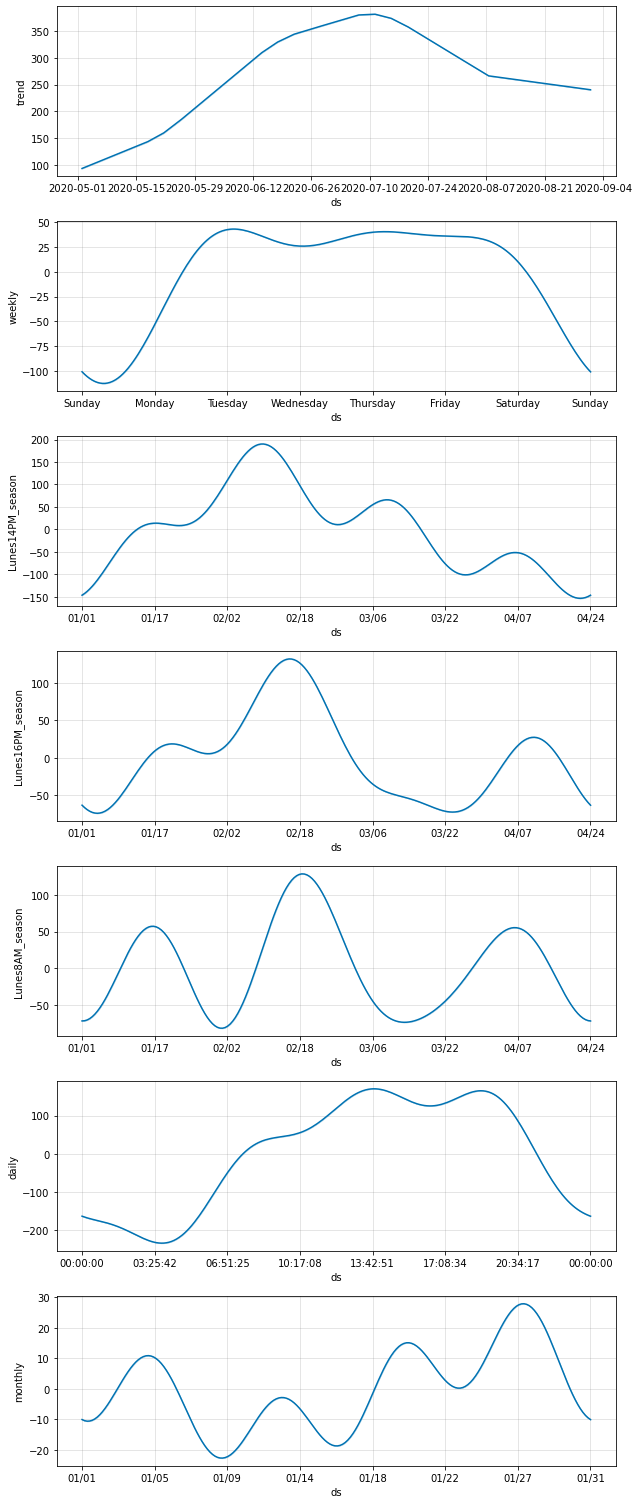

In [16]:
fig, predictions_rolling = rolling_forecast()

In [17]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data = test_data.set_index('ds')

In [18]:
residuals_rolling = test_data['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-08-31 00:00:00,45.264521
2020-08-31 01:00:00,49.084775
2020-08-31 02:00:00,39.293445
2020-08-31 03:00:00,73.979858
2020-08-31 04:00:00,54.798285


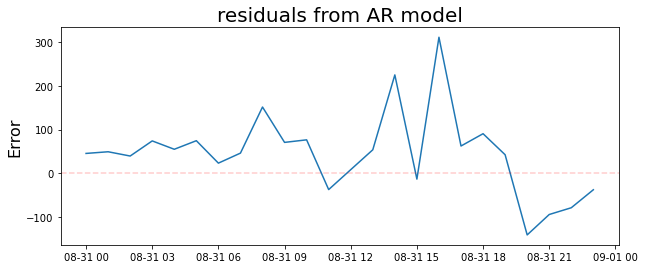

In [19]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

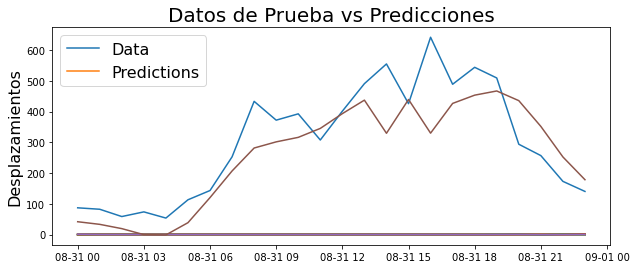

In [20]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [21]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data['y'])),4))

Mean Absolute Percent Error: 0.3623


# RMSE

In [22]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    104.0668
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


104.0667998596376

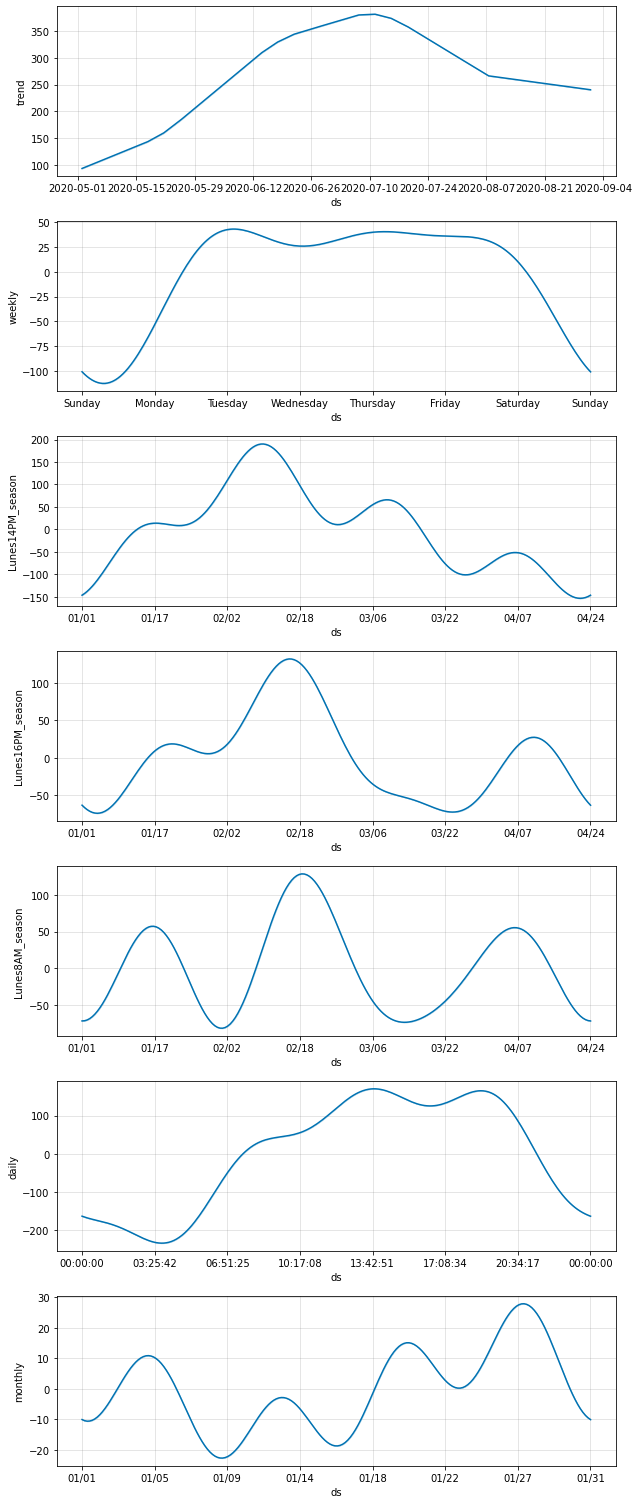

In [23]:
fig

# Nota: Creo que se puede mejorar la predicción si se ajusta el patrón tal cual como se ve en la linea de tiempo (123) y se entrena periodos concretos como desescalada y nueva normalidad.
# Con el in de avanzar propongo que muestre los resultados que has obtenido hasta ahora y lo siguiente es tratar de hacer una simulación implementando un regresor. 